(77, 102, 3)

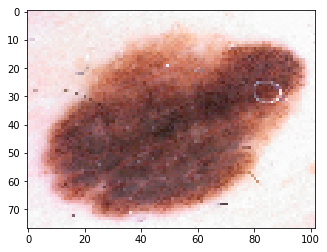

In [12]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import pandas as pd
import numpy as np
from skimage.transform import rescale

%matplotlib inline

random_state = 31415
img = rescale(imread('../../ISIC-2017_Training_Data/ISIC_0000111.jpg'), 0.05)
plt.imshow(img)
img.shape

In [2]:
features = np.zeros((img.shape[0], img.shape[1], img.shape[2]+2))
x = np.linspace(0, 1, img.shape[1])
y = np.linspace(0, 1, img.shape[0])
xv, yv = np.meshgrid(x, y)

features[:, :, 0:3] = 255 - img
features[:, :, 3] = xv
features[:, :, 4] = yv

cvecs = features.reshape((features.shape[0]*features.shape[1], features.shape[2]))
cvecs.shape


(30388, 5)

/Users/KevinMichael/Documents/uni/3B/mi/venv/lib/python2.7/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7854 but corresponding boolean dimension is 30388


IndexError: index 19381 is out of bounds for axis 0 with size 7854

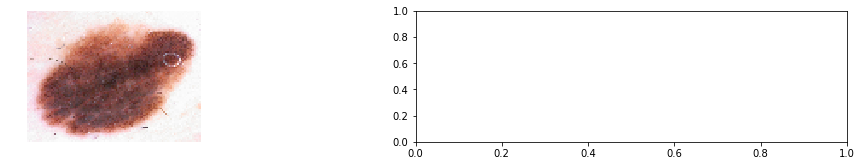

In [15]:
from sklearn.cluster import KMeans
from colorsys import hls_to_rgb

# reference:
# https://stackoverflow.com/questions/37299142/
# how-to-set-a-colormap-which-can-give-me-over-20-distinct-colors-in-matplotlib
def get_distinct_colors(n):

    colors = []

    for i in np.arange(0., 360., 360. / n):
        h = i / 360.
        l = (50 + np.random.rand() * 10) / 100.
        s = (90 + np.random.rand() * 10) / 100.
        colors.append(hls_to_rgb(h, l, s))

    return colors

def identify_objects(n_objects, features, orig_shape):
    col_map = np.array(get_distinct_colors(n_objects))
    kmobjs = KMeans(n_clusters=n_objects, random_state=random_state)
    kmobjs.fit(features)
    fig = plt.figure()
    fig.set_size_inches(17, 14)
    plt.subplot(5, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    
    for i in range(n_objects):
        fimg = np.copy(img.reshape(orig_shape[0]*orig_shape[1], orig_shape[2]))
        plt.subplot(5, 2, 2+i)
        #plt.imshow(col_map[kmobjs.labels_].reshape(img.shape))
        fimg[kmobjs.labels_ == i] = [1.0, 0.0, 0.0]
        plt.imshow(fimg.reshape(img.shape))
        plt.axis('off')
    plt.tight_layout()

identify_objects(9, cvecs, img.shape)